<h1><center>Laboratorio 9: Los huesos de Hipócrates 🦴</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Felipe Aguilar
- Nombre de alumno 2: Joaquín Pérez O.


### **Link de repositorio de GitHub:** `https://github.com/JoaquinPerez17/Lab-MDS7202`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Creación de clasificadores de imagenes a traves de redes Fully connected y CNN.
- Uso de Dataloaders para la carga de datasets.
- Comparación de Fully Connected y red convolucional.

## Reglas:

- Fecha de entrega: 17/11/2022
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Creación de modelos de clasificación de imágenes utilizando Pytorch.
- Creación de dataloader y aplicar transformaciones sobre el dataset.
- Comprender la diferencia entre una CNN y una Fully Connected.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones de `Pytorch`, la cual, está enfocada para proyectos de Deep Learning.


# Importamos librerias utiles 😸

Comenzamos importando librerías utiles para la ejecución del laboratorio:

In [ ]:
import os
import time
from PIL import Image

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, random_split

import torchvision
from torchvision import datasets, models
from torchvision import transforms as T

from timeit import default_timer as timer
from sklearn.metrics import accuracy_score
import sys

import warnings
warnings.filterwarnings("ignore")
# semilla fija para que los experimentos sean repetibles
t_cg = torch.manual_seed(42)

# Identificando los Huesos de Hipócrates🔎

<p align="center">
  <img src="https://i.pinimg.com/originals/d8/58/66/d85866cd1cc3979f94526551addf74b4.gif" width="300">
</p>

Tras el éxito que han tenido proponiendo modelos de machine learning en trabajos anteriores, el famoso medico Hipócrates se ha contactado con ustedes para solicitarles ayuda para automatizar la identificación de radiografías de partes humanas. Para esto, les señala que le gustaría utilizar algoritmos de deep learning producto que Demócrito le señalo que resultan la mejor alternativa para la predicción de imágenes.

En su conversación con el medico usted le comenta que ha tenido algunas clases relacionadas a Deep Learning, por esto, están motivados en abordar el problema utilizando redes Fully Connected y redes convolucionales con Pytorch. Sin embargo, al anunciarle los tipos de redes que conocen, el filósofo les comenta que no había escuchado muy buenos resultados por parte de las CNN, por lo que les pide que comprueben a traves de la métrica de accuracy que tipo de redes es mejor para la tarea de identificación de radiografías. ¿Será cierto lo que dice el filósofo?, Veámoslo en un nuevo capítulo de los Laboratorios de Programación Científica para Ciencia de Datos!

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Laboratorios MDS/Laboratorio_9/'
except: 
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Laboratorios MDS/Laboratorio_9/Medical-MNIST.zip" 

Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: Medical-MNIST/HeadCT/005000.jpeg  
 extracting: Medical-MNIST/HeadCT/005001.jpeg  
 extracting: Medical-MNIST/HeadCT/005002.jpeg  
 extracting: Medical-MNIST/HeadCT/005003.jpeg  
  inflating: Medical-MNIST/HeadCT/005004.jpeg  
 extracting: Medical-MNIST/HeadCT/005005.jpeg  
 extracting: Medical-MNIST/HeadCT/005006.jpeg  
 extracting: Medical-MNIST/HeadCT/005007.jpeg  
 extracting: Medical-MNIST/HeadCT/005008.jpeg  
 extracting: Medical-MNIST/HeadCT/005009.jpeg  
  inflating: Medical-MNIST/HeadCT/005010.jpeg  
  inflating: Medical-MNIST/HeadCT/005011.jpeg  
 extracting: Medical-MNIST/HeadCT/005012.jpeg  
 extracting: Medical-MNIST/HeadCT/005013.jpeg  
 extracting: Medical-MNIST/HeadCT/005014.jpeg  
 extracting: Medical-MNIST/HeadCT/005015.jpeg  
 extracting: Medical-MNIST/HeadCT/005016.jpeg  
 extracting: Medical-MNIST/HeadCT/005017.jpeg  
 extracting: Medical-MNIST/HeadCT/005018.jpeg  
 extracting: Medical-MNIST/

## 1.1 Creación de Lista de Archivos

<p align="center">
  <img src="https://media.tenor.com/BJ-9w-MUVCMAAAAM/tis100-sad.gif" width="300">
</p>


Comience revisando de forma manual cada una de las imágenes que posee la carpeta subida a material docente. Verifique la cantidad de tipos de radiografías que se tienen y la cantidad de imágenes que dispone cada carpeta.

Revisado el contenido de las imágenes, utilice `os.listdir` para crear un `numpy.array` o un `Dataframe` que contenga las imágenes y un label que señale al tipo de radiografía a la que hace referencia la imagen. Para hacer las etiquetas codifique el tipo de imágenes en números que vayan del 0 al total de tipos de radiografías, no utilice strings para codificar las etiquetas.

**Ejemplo de Estructura:**

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax"></th>
    <th class="tg-0lax">image_path</th>
    <th class="tg-0lax">label</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">image1</td>
    <td class="tg-0lax">1</td>
  </tr>
  <tr>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">image2</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">2</td>
    <td class="tg-0lax">image3</td>
    <td class="tg-0lax">2</td>
  </tr>
  <tr>
    <td class="tg-0lax">3</td>
    <td class="tg-0lax">image4</td>
    <td class="tg-0lax">0</td>
  </tr>
  <tr>
    <td class="tg-0lax">4</td>
    <td class="tg-0lax">image5</td>
    <td class="tg-0lax">4</td>
  </tr>
</tbody>
</table>

In [ ]:
# Código Aquí
df = []
path_carpeta = 'D:/Documentos Pipe/Cursos magister/MDS7202 Laboratorio de Programación Científica para Ciencia de Datos/Laboratorios/Lab 9/Medical-MNIST'
for i, category in enumerate(os.listdir(path_carpeta)):
  label = i
  path_subcarpeta = path_carpeta + '/' + category 
  for image in os.listdir(path_subcarpeta):
    images = f"{path_subcarpeta}/{image}"
    df.append([images, label])
df =  np.array(df)

## 1.2 Creación de Dataset

Tomando en cuenta la estructura de datos desarrollada en el punto 1.1, construya la clase `MedicalDataset()` que cumpla los siguientes puntos:

- [ ] Poseer un `__init__` en el que se almacene `estructura` creada en 1.1, la `raiz` de la carpeta y una función que permita transformar el dataset (de esto no se preocupe mucho, ya que solamente debe almacenar una función en el atributo).
- [ ] La clase debe ser capaz de entregar la cantidad de elementos a traves de `__len__`.
- [ ] Debe poseer el método `__getitem__` que retorne una tupla con la imagen y su correspondiente etiqueta.

In [ ]:
# Código Aquí
class MedicalDataset(Dataset):
    def __init__(self, estructura, raiz, transform):
        self.estructura = estructura
        self.raiz = raiz
        self.transform = transform
    
    def __getitem__(self, index):
        
        # Un poco de ayuda para cargar la imagen
        img_path = self.estructura[index][0]
        image = Image.open(img_path).convert('RGB')

        label = torch.tensor(int(self.estructura[index][1]))

        # Auida para realizar la transformación
        if self.transform:
            image = self.transform(image)

        return label, image
    
    def __len__(self):
        return len(self.estructura)

## 1.3 Prueba del MedicalDataset

Con la clase construida en el punto 1.2, verifique su funcionamiento cargando el dataset y realizando las transformaciones que entrega la función `transform_image`. Compruebe a través de un ejemplo las transformaciones aplicadas en la imagen, comentando la función que cumple `MedicalDataset` y si es posible observar todas las transformaciones aplicadas con la función `transform_image`.

- [ ] Probar la clase MedicalDataset y aplicando una transformación de "train"
- [ ] Plotear un ejemplo del MedicalDataset.

**Función para transformar las imagenes:**

In [ ]:
def transform_image(stage = None):
    
    if stage == "train":
        Tr_img = T.Compose([T.Resize(size = (64, 64)),T.ToTensor()])
        
    elif stage == "test" or stage == "val":
        Tr_img = T.Compose([T.Resize(size = (64,64)), T.ToTensor()]) 

    return Tr_img

**Código para obtener un ejemplo:**

In [ ]:
# Prueba del dataset
dataset = MedicalDataset(df, path_carpeta, transform_image("test"))

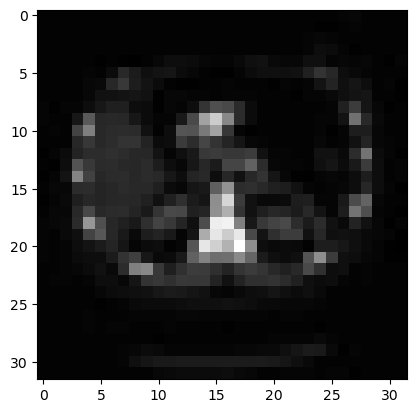

In [ ]:
labels, features = next(iter(dataset))
img = features[0]
label = labels
plt.imshow(img, cmap='gray')

En el ejemplo anterior se observa la transformación realizada, presenciando un 'resize' de la imagen a un tamaño de 64x64 px. 
De la definición de clases esta dice *"permite estructurar programas, de manera tal que es posible asociar acciones (métodos) y propiedades (atributos) a entidades llamadas objetos. Las relaciones entre objetos encargados de procesar tareas de diversa índole permiten estructurar ordenadamente el programa y obtener de manera mas sencilla los resultados buscados."* por lo tanto, la clase `MedicalDataset` da una estructura de orden al dataset permitiendo leer los datos de entrada, etiquetarlos y tener el método necesario para transformar las imágenes.
La función `transform_image` permite visualizar todas las transformaciones aplicadas por esta función, solo que para este caso el resize que se realiza tiene el mismo tamaño por lo que el resultado es el mismo. Esto se hace con motivos de memoria y tiempo de ejecución ded las celdas futuras, es específico, el entrenamiento de la red neuronal.

## 1.4 Creación de Clasificadores

<p align="center">
  <img src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2018/01/conv-full-layer.gif" width="300">
</p>

A continuación, deben construir tres clasificadores con los que deberán verificar cuál de las arquitecturas posee un mejor desempeño para la tarea de clasificación de imágenes. Para la construcción considere los siguientes puntos:

- [ ] Señale cual es el objetivo del `forward` en este tipo de redes, sea breve para su explicación.
- [ ] Construir una red Fully Connected para solucionar el problema de clasificación. Para esta parte se le aconseja que rellene el esqueleto dispuesto más abajo y que lleva el nombre de `FCClassifier`, en el deberá rellenar con la dimensión de las capas ocultas y verificar cual será el tamaño de la entrada.
- [ ] Construya una red convolucional **simple** (no más de una capa convolucional) para la tarea de clasificación de imágenes, para esto basen su código en la clase del día `09-11-2022`.
- [ ] Crear una red convolucional más compleja. Para esta parte tienen completa libertad en la construcción de su red, lo único que debe cumplir es que sea convolucional.


El objetivo del `forward` es  predecir los ejemplos de entramiento, a través de, procesos matemáticos que se realizan
en la CNN al paso de información por cada capa de la red neuronal para generar una respuesta o predicción de salida; 

La primera red es una fully connected de 3 capas. La segunda red ocupa la misma estructura de clasificación que la fully connected, pero agrega una capa convolucional. La tercera capa es una versión muy simplificada de la red VGG-16, pues utiliza menos capas convolucionales, y distintos valores de neuronas en las capas ocultas.

In [ ]:
class FCClassifier(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(FCClassifier, self).__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_channels, 600)
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(600, 120)
        self.drop2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(120, num_classes)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        x = self.drop2(x)
        x = F.relu(self.fc3(x))
        return x

In [ ]:
class CNNClassifier1(nn.Module):
  def __init__(self, in_channels, num_classes):
    super(CNNClassifier1, self).__init__()

    self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d((2,2), stride=2, padding=0)
        )

    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(32 * 31 * 31, 600)
    self.drop1 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(600, 120)
    self.drop2 = nn.Dropout(0.5)
    self.fc3 = nn.Linear(120, num_classes)
    
  def forward(self, x):
    x = self.layer1(x)
    x = self.flatten(x)
    x = F.relu(self.fc1(x))
    x = self.drop1(x)
    x = F.relu(self.fc2(x))
    x = self.drop2(x)
    x = F.relu(self.fc3(x))
    return x

In [ ]:
class CNNClassifier2(nn.Module):
  def __init__(self, in_channels, num_classes):
    super(CNNClassifier2, self).__init__()

    self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d((2,2), stride=2, padding=0))
  
    self.layer2 = nn.Sequential(
              nn.Conv2d(in_channels=64, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.BatchNorm2d(256),
              nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.BatchNorm2d(256),
              nn.MaxPool2d((2,2), stride=2, padding=0))
    
    self.layer3 = nn.Sequential(
              nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3),
              nn.ReLU(),
              nn.BatchNorm2d(512),
              nn.MaxPool2d((2,2), stride=2, padding=0))

    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(512 * 5 * 5 , 256)
    self.drop1 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(256, 120)
    self.drop2 = nn.Dropout(0.5)
    self.fc3 = nn.Linear(120, num_classes)
    
  def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = self.layer3(x)
      x = self.flatten(x)
      x = F.relu(self.fc1(x))
      x = self.drop1(x)
      x = F.relu(self.fc2(x))
      x = self.drop2(x)
      x = F.relu(self.fc3(x))
      return x 

## 1.5 Separando Datos para el Entrenamiento

<p align="center">
  <img src="https://c.tenor.com/Esn7Jif-ZLQAAAAC/separate-square.gif" width="200">
</p>

Utilizando un Holdout a su gusto, separe los datos en un conjunto de entrenamiento y de testing. Aplique las transformaciones correspondientes usando `transform_image` para cada conjunto de datos y utilice `torch.utils.data.DataLoader` para crear un objeto iterable del dataset.

- [ ] Definir el Holdout a utilizar.
- [ ] Separar los datos en un conjunto de entrenamiento y prueba.
- [ ] Aplicar las transformaciones correspondientes en cada uno de los dataset.
- [ ] Utilizar `DataLoader` de pytorch sobre los dataset.

In [ ]:
# Separar Datos de Entrenamiento
train_size = int(0.7 * len(df))
test_size = len(df) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(df, [train_size, test_size])
train_dataset = MedicalDataset(train_dataset, path_carpeta, transform_image("train"))
test_dataset = MedicalDataset(test_dataset, path_carpeta, transform_image("test"))

## 1.6 Creación de Funciones de Entrenamiento y Evaluación

<p align="center">
  <img src="https://www.researchgate.net/publication/319535615/figure/fig3/AS:536187598065664@1504848493070/A-typical-convolutional-neural-network-CNN-Architecture-for-Medical-Image-Classification.png" width="500">
</p>


Ya construido todas las funciones y clases necesarias llego el momento más importante... probar la red. Para esta sección, ustedes deberán ser capaces de definir los hiperparámetros de la red, definir las funciones de perdida a utilizar, señalar el optimizador a usar y finalmente crear sus funciones para el entrenamiento y prueba. Para realizar esta parte más estructurada, seguir los siguientes puntos de forma secuencial:

- [ ] Especifique los Hiperparámetros de las 3 redes. Para esta parte sea claro de su elección y señale el porqué de sus elecciones (o sea justifique el setting de sus hiperparámetros).
- [ ] Defina los modelos a utilizar, el optimizador que utilizará para el modelo y señale la función de perdida que utilizará.
- [ ] Explique de forma breve la función que cumplen los pasos `Backward` y `Descenso del gradiente` en una red neuronal.
- [ ] Cree una función llamado `train` que entrene a los clasificadores. Para esto, recuerde que estos modelos suelen utilizar un número de épocas, por lo que deberá generar un proceso iterativo de entrenamiento. Es importante que su función imprima las `loss` obtenidas por el modelo en cada época (si gusta puede almacenar estas losses en una lista para luego graficarlas y comparar).
- [ ] Diseñe una función para evaluar el desempeño de las redes. Para evaluar las redes utilice solamente la métrica accuracy (para esto se le recomienda comparar la predicción con el ground truth)

---
**RESPUESTA**

`num_classes`, `lr` y `batch_size` son los mismos para las 3 redes. Son 6 clases en todos los casos. Se escoge el `lr` más estándar para que la actualización no sea tan leve y tampoco tan brusca. El tamaño del `batch_size` está dentro de un rango en el cual la memoria requerida no sea tan alta y el entrenamiento no sea tan lento, además, no se escoge un tamaño tan pequeño para que la red no sea menos precisa en la estimación del gradiente. Cabe destacar que mantener los mismo valores en las 3 redes, es para poder tener un proceso  posterior de comparación.

Para la red fully-connected, se utiliza un `in_channels_fc` igual a la dimensión que tiene la entrada, pero de manera aplanada, vale decir, luego de haberle aplicado un flatten. Tanto en la red cnn1 como en la red cn2, `in_channels_cnn` es igual a la cantidad de canales de entrada, como se trata de imágenes en 3 dimensiones, el valor tiene que ser 3.


El `backward` es el proceso de ajuste y actualización de los parámetros de la red, de forma de minimizar lo máximo posible el error. El proceso se realiza propagando el error desde las últimas capas hacia las primeras capas. 

El `Descenso del gradiente` es un método de optimización de una función de pérdida. El método permite converger hacia el menor valor posible de la función, a través de un proceso iterativo.

In [ ]:
# train
def train(model, train_loader, num_epochs, criterio, optimizador, device=None):
    model.to(device)
    tiempo_epoca = 0
    loss_train = []
    for e in range(1, n_epochs+1):
        inicio_epoca = timer()
        model.train()
        train_loss = 0.0

        for i, (label, data) in enumerate(train_loader, 0):
            # desagregación de los datos y traspaso a cuda
            targets = label.to(device)
            data = data.float().to(device)
             # Limpiar gradientes 
            optimizador.zero_grad()         
            #Forward
            outputs = model(data) 
            #Backward
            loss = criterio(outputs, targets)
            loss.backward()
            # Descenso del gradiente
            optimizador.step()

             # loss train
            train_loss += loss.item()
            loss_avg = train_loss/(i+1)
            sys.stdout.write(f'\rÉpoca:{e} ' + 'Entrenamiento->' + f' Train Loss:{loss_avg:02.4f}. ')

        tiempo_epoca += timer() - inicio_epoca  
        loss_train.append(loss_avg)
        sys.stdout.write(f'Tiempo de época:{tiempo_epoca/e:.2f}s.\n')

    return loss_train

# Evaluate
def evaluate(loader, model, device = None):
    model.to(device)
    model.eval()
    predicted = []
    true = []
    with torch.no_grad():
        for i, (label, data) in enumerate(loader):
          targets = label.to(device)
          data = data.float().to(device)
          outputs = model(data)
          predicts = torch.argmax(outputs, dim=1)
          predicted += predicts.tolist()
          true += targets.tolist()

    acc = round(accuracy_score(true, predicted), 4)
    return acc

In [ ]:
def plot_results(l_train1, l_train2, l_train3):
  figure = plt.figure(1)
  ax = figure.add_subplot(111)
  ax.set_title('Loss Train')    
  ax.set_xlabel('epochs')
  ax.set_ylabel('loss')
  ax.plot(l_train1, c='b')
  ax.plot(l_train2, c='r')
  ax.plot(l_train3, c='g')
  ax.legend(['loss-train-fc', 'loss-train-cnn1', 'loss_train-cnn2'])
  figure.show()


In [ ]:
# Especificar hyperparámetros de las redes
in_channels_fc = 64 * 64 * 3
in_channels_cnn = 3
num_classes = 6
lr = 1e-3
batch_size = 100
n_epochs = 10

In [ ]:
# Red 1
model_fc = FCClassifier(in_channels_fc, num_classes)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_fc.parameters(), lr=1e-3)  

In [ ]:
# Uso de torch.utils.data.DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)  

## 1.7 Comparación de Resultados

<p align="center">
  <img src="https://media2.giphy.com/media/icJA0VF7ntoEL18Jez/giphy.gif"  width="200">
</p>

Construidas las funciones de entrenamiento y evaluación, entrene a las redes que construyo y compare los resultados obtenidos con todas las redes señalando cual posee mejor rendimiento. Comente una diferencia entre las redes Fully Connected y CNN podría generar un mejor desempeño en una u otra en la tarea de clasificación de imágenes.

- [ ] Entrenar las redes.
- [ ] Evaluar las redes.
- [ ] Comentar los resultados obtenidos y visualizar si existe una diferencia significativa en el rendimiento debido a la naturaleza de la red.

In [ ]:
Loss_train_fc = train(model_fc, train_loader, n_epochs, criterion, optimizer, 'cuda')

In [ ]:
# Red 2
model_cnn1 = CNNClassifier1(in_channels_cnn, num_classes)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn1.parameters(), lr=1e-3)  

In [ ]:
Loss_train_cnn1 = train(model_cnn1, train_loader, n_epochs, criterion, optimizer, 'cuda')

Época:1 Entrenamiento-> Train Loss:0.2531. Tiempo de época:25.17s.
Época:2 Entrenamiento-> Train Loss:0.0305. Tiempo de época:25.53s.
Época:3 Entrenamiento-> Train Loss:0.0214. Tiempo de época:25.57s.
Época:4 Entrenamiento-> Train Loss:0.0122. Tiempo de época:25.63s.
Época:5 Entrenamiento-> Train Loss:0.0156. Tiempo de época:25.49s.
Época:6 Entrenamiento-> Train Loss:0.0194. Tiempo de época:25.53s.
Época:7 Entrenamiento-> Train Loss:0.0080. Tiempo de época:25.48s.
Época:8 Entrenamiento-> Train Loss:0.0105. Tiempo de época:26.10s.
Época:9 Entrenamiento-> Train Loss:0.0116. Tiempo de época:26.26s.
Época:10 Entrenamiento-> Train Loss:0.0124. Tiempo de época:26.57s.


In [ ]:
# Red 3
model_cnn2 = CNNClassifier2(in_channels_cnn, num_classes)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn2.parameters(), lr=1e-3)  

In [ ]:
Loss_train_cnn2 = train(model_cnn2, train_loader, n_epochs, criterion, optimizer, 'cuda')

Época:1 Entrenamiento-> Train Loss:0.0713. Tiempo de época:65.42s.
Época:2 Entrenamiento-> Train Loss:0.0129. Tiempo de época:65.36s.
Época:3 Entrenamiento-> Train Loss:0.0146. Tiempo de época:65.02s.
Época:4 Entrenamiento-> Train Loss:0.0436. Tiempo de época:64.86s.
Época:5 Entrenamiento-> Train Loss:0.0096. Tiempo de época:64.75s.
Época:6 Entrenamiento-> Train Loss:0.0298. Tiempo de época:64.57s.
Época:7 Entrenamiento-> Train Loss:0.0084. Tiempo de época:64.50s.
Época:8 Entrenamiento-> Train Loss:0.0125. Tiempo de época:64.37s.
Época:9 Entrenamiento-> Train Loss:0.0092. Tiempo de época:64.80s.
Época:10 Entrenamiento-> Train Loss:0.0106. Tiempo de época:64.72s.


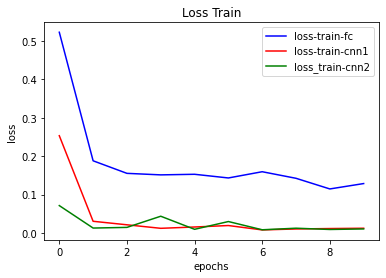

In [ ]:
plot_results(Loss_train_fc, Loss_train_cnn1, Loss_train_cnn2)

In [ ]:
accucary_test_fc = evaluate(test_loader, model_fc, 'cuda')
print(f"Accuracy en conjunto test - Red fc: {accucary_test_fc}")

accucary_test_cnn1 = evaluate(test_loader, model_cnn1, 'cuda')
print(f"Accuracy en conjunto test - Red cnn1: {accucary_test_cnn1}")

accucary_test_cnn2 = evaluate(test_loader, model_cnn2, 'cuda')
print(f"Accuracy en conjunto test - Red cnn2: {accucary_test_cnn2}")


Accuracy en conjunto test - Red fc: 0.991
Accuracy en conjunto test - Red cnn1: 0.9984
Accuracy en conjunto test - Red cnn2: 0.9988


---

Los mejores resultados presentan un mayor accuaracy para la red CNN más compleja de tres capas, sin embargo, el rendimiento de la red CNN de una capa y la red Fully Connected logran valores similares que difieren en milésimas, por lo que para el set de datos las tres redes implementadas son válidas y satisfactorias en sus resultados. 

Las redes Fully Connected no hacen suposiciones sobre la entrada, tienden a funcionar menos y no son buenas para la extracción de características. Además, tienen una mayor cantidad de pesos para entrenar, lo que da como resultado un mayor tiempo de entrenamiento, mientras que, las CNN están capacitadas para identificar y extraer las mejores características de las imágenes para el problema en cuestión, con relativamente menos parámetros para entrenar.

Del gráfico de función de perdida se aprecia que las CNN alcanzan valores de perdida menores, lo que explica en gran medida los resultados. En los tres casos se observa un comportamiento similar del loss, primero se empieza con un loss alto para luego ir disminuyendo hasta el momento en que la red no logra aprender más. Si se hubiese elegido más épocas, se podría incluso llegar a valores cercanos al 100% de accuracy, pero esto no está considerando el sobreajuste, por lo que no sería un camino válido. Una opción para tener un resultado más realista, es usar un conjunto de validación y aplicar early stopping al momento de entrenar.


# Conclusión

Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media.tenor.com/vKSR-ZakVMIAAAAC/pochitadancing-pochita.gif">
</p>